### Physical property Clustering

In [1]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import os.path
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, AffinityPropagation
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.simplefilter('ignore')

In [2]:
# reading csv file
df=pd.read_csv('/content/physical.csv')
df.head()

,No,Block No,?n (gr/cm3),?d (gr/cm3),?s (gr/cm3),?n (kg/m3),?d (kg/m3),?s (kg/m3),Gs,WC (%),n (%),e
0,1,2,2.29,2.14,2.29,2287.0,2143.0,2191.0,2.09,6.57,14.8,0.17
1,2,5A,2.25,NaN,NaN,2253.0,NaN,NaN,2.10,8.37,NaN,NaN
2,3,5B,2.27,2.15,2.28,2269.0,2152.0,2279.0,2.12,7.37,12.7,0.15
3,4,5C,2.24,2.14,2.24,2242.0,2144.0,2243.0,2.12,5.99,9.8,0.11
4,5,5D-A,2.23,2.05,2.22,2233.0,2052.0,2218.0,2.06,8.93,16.6,0.20


In [3]:
#checking the rows and columns
df.shape

(150, 12)

In [4]:
d = df.copy()
d.head()

,No,Block No,?n (gr/cm3),?d (gr/cm3),?s (gr/cm3),?n (kg/m3),?d (kg/m3),?s (kg/m3),Gs,WC (%),n (%),e
0,1,2,2.29,2.14,2.29,2287.0,2143.0,2191.0,2.09,6.57,14.8,0.17
1,2,5A,2.25,NaN,NaN,2253.0,NaN,NaN,2.10,8.37,NaN,NaN
2,3,5B,2.27,2.15,2.28,2269.0,2152.0,2279.0,2.12,7.37,12.7,0.15
3,4,5C,2.24,2.14,2.24,2242.0,2144.0,2243.0,2.12,5.99,9.8,0.11
4,5,5D-A,2.23,2.05,2.22,2233.0,2052.0,2218.0,2.06,8.93,16.6,0.20


### Preporcessing to extract GAD numbers from Block no column

In [5]:
df['    Block     No']

0         2
1        5A
2        5B
3        5C
4      5D-A
       ... 
145    37-4
146    39-1
147    39-2
148    40-1
149    40-5
Name:     Block     No, Length: 150, dtype: object

In [6]:
# Extracting the part before the hyphen
df['GAD'] = df['    Block     No'].str.split('-', n=1).str[0]

# Displaying the DataFrame with the extracted values
df

,No,Block No,?n (gr/cm3),?d (gr/cm3),?s (gr/cm3),?n (kg/m3),?d (kg/m3),?s (kg/m3),Gs,WC (%),n (%),e,GAD
0,1,2,2.29,2.14,2.29,2287.0,2143.0,2191.0,2.09,6.57,14.80,0.17,2
1,2,5A,2.25,NaN,NaN,2253.0,NaN,NaN,2.10,8.37,NaN,NaN,5A
2,3,5B,2.27,2.15,2.28,2269.0,2152.0,2279.0,2.12,7.37,12.70,0.15,5B
3,4,5C,2.24,2.14,2.24,2242.0,2144.0,2243.0,2.12,5.99,9.80,0.11,5C
4,5,5D-A,2.23,2.05,2.22,2233.0,2052.0,2218.0,2.06,8.93,16.60,0.20,5D
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,37-4,2.28,2.21,2.29,2284.0,2216.0,2292.0,2.28,9.70,7.60,0.08,37
146,147,39-1,2.26,2.20,2.27,2261.0,2200.0,2267.0,2.24,4.75,6.75,0.07,39
147,148,39-2,2.28,2.13,2.27,2284.0,2131.0,2271.0,2.26,7.39,13.90,0.16,39
148,149,40-1,2.23,2.19,2.25,2234.0,2187.0,2250.0,2.22,3.40,6.25,0.07,40


In [7]:
df['GAD']

0       2
1      5A
2      5B
3      5C
4      5D
       ..
145    37
146    39
147    39
148    40
149    40
Name: GAD, Length: 150, dtype: object

In [8]:
# Removing alphabets from the column
df['GAD'] = df['GAD'].str.replace('[^0-9]', '', regex=True)
df.head()

,No,Block No,?n (gr/cm3),?d (gr/cm3),?s (gr/cm3),?n (kg/m3),?d (kg/m3),?s (kg/m3),Gs,WC (%),n (%),e,GAD
0,1,2,2.29,2.14,2.29,2287.0,2143.0,2191.0,2.09,6.57,14.8,0.17,2
1,2,5A,2.25,NaN,NaN,2253.0,NaN,NaN,2.10,8.37,NaN,NaN,5
2,3,5B,2.27,2.15,2.28,2269.0,2152.0,2279.0,2.12,7.37,12.7,0.15,5
3,4,5C,2.24,2.14,2.24,2242.0,2144.0,2243.0,2.12,5.99,9.8,0.11,5
4,5,5D-A,2.23,2.05,2.22,2233.0,2052.0,2218.0,2.06,8.93,16.6,0.20,5


### Data preprocessing and standardization

In [9]:
# checking null values
d.isnull().sum()

No                        0
    Block     No          0
 ?n  (gr/cm3)             5
   ?d     (gr/cm3)       12
 ?s       (gr/cm3)       12
 ?n           (kg/m3)     6
   ?d      (kg/m3)       12
     ?s      (kg/m3)     12
Gs                        6
WC     (%)                3
n           (%)          12
e                        12
dtype: int64

In [10]:
# fill null values with zero
d.fillna(0, inplace=True)

In [11]:
# checking all null values are filled
d.isnull().sum()

No                       0
    Block     No         0
 ?n  (gr/cm3)            0
   ?d     (gr/cm3)       0
 ?s       (gr/cm3)       0
 ?n           (kg/m3)    0
   ?d      (kg/m3)       0
     ?s      (kg/m3)     0
Gs                       0
WC     (%)               0
n           (%)          0
e                        0
dtype: int64

In [12]:
d.head()

,No,Block No,?n (gr/cm3),?d (gr/cm3),?s (gr/cm3),?n (kg/m3),?d (kg/m3),?s (kg/m3),Gs,WC (%),n (%),e
0,1,2,2.29,2.14,2.29,2287.0,2143.0,2191.0,2.09,6.57,14.8,0.17
1,2,5A,2.25,0.00,0.00,2253.0,0.0,0.0,2.10,8.37,0.0,0.00
2,3,5B,2.27,2.15,2.28,2269.0,2152.0,2279.0,2.12,7.37,12.7,0.15
3,4,5C,2.24,2.14,2.24,2242.0,2144.0,2243.0,2.12,5.99,9.8,0.11
4,5,5D-A,2.23,2.05,2.22,2233.0,2052.0,2218.0,2.06,8.93,16.6,0.20


In [13]:
d.columns

Index(['No', '    Block     No', ' ?n  (gr/cm3)', '   ?d     (gr/cm3)',
       ' ?s       (gr/cm3)', ' ?n           (kg/m3)', '   ?d      (kg/m3)',
       '     ?s      (kg/m3)', 'Gs ', 'WC     (%)', 'n           (%)', 'e'],
      dtype='object')

In [14]:
# dropping unnecessary columns (no and block no)
d = d.drop(['No', '    Block     No'], axis=1)
d.head()

,?n (gr/cm3),?d (gr/cm3),?s (gr/cm3),?n (kg/m3),?d (kg/m3),?s (kg/m3),Gs,WC (%),n (%),e
0,2.29,2.14,2.29,2287.0,2143.0,2191.0,2.09,6.57,14.8,0.17
1,2.25,0.00,0.00,2253.0,0.0,0.0,2.10,8.37,0.0,0.00
2,2.27,2.15,2.28,2269.0,2152.0,2279.0,2.12,7.37,12.7,0.15
3,2.24,2.14,2.24,2242.0,2144.0,2243.0,2.12,5.99,9.8,0.11
4,2.23,2.05,2.22,2233.0,2052.0,2218.0,2.06,8.93,16.6,0.20


In [15]:
# Selecting columns for clustering
columns_for_clustering = [' ?n  (gr/cm3)', '   ?d     (gr/cm3)',
       ' ?s       (gr/cm3)', ' ?n           (kg/m3)', '   ?d      (kg/m3)',
       '     ?s      (kg/m3)', 'Gs ', 'WC     (%)', 'n           (%)']

In [16]:
# Selecting only the columns for clustering
data_for_clustering = d[columns_for_clustering]

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Standardize the data using z-score normalization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)
scaled_data

array([[ 0.31117985,  0.26060078,  0.34457778, ...,  0.0575638 ,
         0.44206667,  0.99043497],
       [ 0.21249702, -3.36544392, -3.38337391, ...,  0.08090047,
         1.30460463, -1.6354585 ],
       [ 0.26183844,  0.27754492,  0.32829851, ...,  0.12757382,
         0.82541687,  0.61784198],
       ...,
       [ 0.28650914,  0.24365665,  0.31201925, ...,  0.45428725,
         0.83500063,  0.83075226],
       [ 0.16315561,  0.34532145,  0.27946072, ...,  0.36094056,
        -1.0769585 , -0.52655078],
       [-0.10822217, -3.36544392, -3.38337391, ...,  0.38427723,
        -2.70619685, -1.6354585 ]])

In [18]:
# Convert scaled_data array back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=columns_for_clustering)
scaled_df.head()

,?n (gr/cm3),?d (gr/cm3),?s (gr/cm3),?n (kg/m3),?d (kg/m3),?s (kg/m3),Gs,WC (%),n (%)
0,0.311180,0.260601,0.344578,0.306904,0.267832,0.182047,0.057564,0.442067,0.990435
1,0.212497,-3.365444,-3.383374,0.230024,-3.363166,-3.383274,0.080900,1.304605,-1.635458
2,0.261838,0.277545,0.328299,0.266203,0.283081,0.325245,0.127574,0.825417,0.617842
3,0.187826,0.260601,0.263181,0.205151,0.269526,0.266664,0.127574,0.164138,0.103309
4,0.163156,0.108104,0.230623,0.184800,0.113646,0.225983,-0.012446,1.572950,1.309800


In [19]:
d['e']

0      0.17
1      0.00
2      0.15
3      0.11
4      0.20
       ... 
145    0.08
146    0.07
147    0.16
148    0.07
149    0.00
Name: e, Length: 150, dtype: float64

In [20]:
concat_df = pd.concat([scaled_df, d['e']], axis=1)
concat_df.head()

,?n (gr/cm3),?d (gr/cm3),?s (gr/cm3),?n (kg/m3),?d (kg/m3),?s (kg/m3),Gs,WC (%),n (%),e
0,0.311180,0.260601,0.344578,0.306904,0.267832,0.182047,0.057564,0.442067,0.990435,0.17
1,0.212497,-3.365444,-3.383374,0.230024,-3.363166,-3.383274,0.080900,1.304605,-1.635458,0.00
2,0.261838,0.277545,0.328299,0.266203,0.283081,0.325245,0.127574,0.825417,0.617842,0.15
3,0.187826,0.260601,0.263181,0.205151,0.269526,0.266664,0.127574,0.164138,0.103309,0.11
4,0.163156,0.108104,0.230623,0.184800,0.113646,0.225983,-0.012446,1.572950,1.309800,0.20


In [21]:
concat_df.columns

Index([' ?n  (gr/cm3)', '   ?d     (gr/cm3)', ' ?s       (gr/cm3)',
       ' ?n           (kg/m3)', '   ?d      (kg/m3)', '     ?s      (kg/m3)',
       'Gs ', 'WC     (%)', 'n           (%)', 'e'],
      dtype='object')

In [22]:
concat_df

,?n (gr/cm3),?d (gr/cm3),?s (gr/cm3),?n (kg/m3),?d (kg/m3),?s (kg/m3),Gs,WC (%),n (%),e
0,0.311180,0.260601,0.344578,0.306904,0.267832,0.182047,0.057564,0.442067,0.990435,0.17
1,0.212497,-3.365444,-3.383374,0.230024,-3.363166,-3.383274,0.080900,1.304605,-1.635458,0.00
2,0.261838,0.277545,0.328299,0.266203,0.283081,0.325245,0.127574,0.825417,0.617842,0.15
3,0.187826,0.260601,0.263181,0.205151,0.269526,0.266664,0.127574,0.164138,0.103309,0.11
4,0.163156,0.108104,0.230623,0.184800,0.113646,0.225983,-0.012446,1.572950,1.309800,0.20
...,...,...,...,...,...,...,...,...,...,...
145,0.286509,0.379210,0.344578,0.300121,0.391520,0.346400,0.500961,1.941924,-0.287027,0.08
146,0.237168,0.362266,0.312019,0.248113,0.364410,0.305718,0.407614,-0.430055,-0.437838,0.07
147,0.286509,0.243657,0.312019,0.300121,0.247500,0.312227,0.454287,0.835001,0.830752,0.16
148,0.163156,0.345321,0.279461,0.187061,0.342384,0.278055,0.360941,-1.076958,-0.526551,0.07


In [23]:
from scipy.spatial.distance import cdist
r = cdist(concat_df, concat_df, 'euclid')
r

array([[0.        , 7.78626134, 0.56255312, ..., 0.59728332, 2.1847626 ,
        8.38535435],
       [7.78626134, 0.        , 7.70918423, ..., 7.73649201, 7.830178  ,
        4.05759389],
       [0.56255312, 7.70918423, 0.        , ..., 0.39607109, 2.24014533,
        8.49034684],
       ...,
       [0.59728332, 7.73649201, 0.39607109, ..., 0.        , 2.35886369,
        8.51065418],
       [2.1847626 , 7.830178  , 2.24014533, ..., 2.35886369, 0.        ,
        7.64418181],
       [8.38535435, 4.05759389, 8.49034684, ..., 8.51065418, 7.64418181,
        0.        ]])

In [24]:
X1=pd.DataFrame(r)
X1

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.000000,7.786261,0.562553,0.955038,1.218794,0.449637,0.926375,1.676079,1.331943,1.497601,...,0.926496,0.594187,2.002400,1.903938,1.774808,2.035489,1.725702,0.597283,2.184763,8.385354
1,7.786261,0.000000,7.709184,7.569911,7.683828,7.720577,7.588895,7.507059,7.337859,7.609466,...,7.419345,7.512967,7.484464,7.527681,7.587586,7.638447,7.720826,7.736492,7.830178,4.057594
2,0.562553,7.709184,0.000000,0.849107,1.073729,0.555732,0.624140,1.513785,1.237459,1.459417,...,0.980197,0.478381,1.479198,1.414391,1.259373,1.494744,1.670589,0.396071,2.240145,8.490347
3,0.955038,7.569911,0.849107,0.000000,1.875999,1.229046,0.401423,2.237683,1.857930,0.620554,...,0.446939,0.662242,1.568160,1.367156,1.346688,1.874539,0.868019,1.054734,1.416658,8.034541
4,1.218794,7.683828,1.073729,1.875999,0.000000,0.793724,1.620495,0.602501,0.680413,2.484037,...,1.873382,1.331131,2.061889,2.144283,1.932984,1.780646,2.722053,1.035551,3.265611,8.811593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2.035489,7.638447,1.494744,1.874539,1.780646,1.906677,1.564720,1.960957,1.970209,2.305653,...,2.129033,1.733424,0.596179,0.850343,0.669811,0.000000,2.380487,1.588909,3.038290,8.931673
146,1.725702,7.720826,1.670589,0.868019,2.722053,2.058108,1.189930,3.066599,2.666282,0.441040,...,1.028430,1.442818,1.929650,1.647186,1.737816,2.380487,0.000000,1.803575,0.663578,7.873597
147,0.597283,7.736492,0.396071,1.054734,1.035551,0.541564,0.935136,1.449207,1.148463,1.662408,...,1.081185,0.511068,1.635348,1.578399,1.416840,1.588909,1.803575,0.000000,2.358864,8.510654
148,2.184763,7.830178,2.240145,1.416658,3.265611,2.549553,1.770525,3.598333,3.161717,0.874297,...,1.447769,1.966368,2.570746,2.287658,2.390710,3.038290,0.663578,2.358864,0.000000,7.644182


In [25]:
# Calculate the mean of the values in the 25th percentile for each column
y = X1.stack().quantile(0.25)
y

0.8213988533165695

In [26]:
adjmat_df=X1.copy()

In [27]:
# setting threshold value as mean of hamming matrix
adjmat_df[adjmat_df < y]=0
adjmat_df[adjmat_df >= y]=1

In [28]:
# Create networkx graph object
import networkx as nx
graphNw = nx.from_pandas_adjacency(adjmat_df,create_using = nx.Graph())

In [29]:
edge_connected=list(graphNw.edges())
edgesDF = pd.DataFrame(edge_connected, columns=['u1', 'u2'])
edgesDF

,u1,u2
0,0,1
1,0,3
2,0,4
3,0,6
4,0,7
...,...,...
8433,146,147
8434,146,149
8435,147,148
8436,147,149


In [30]:
# Perform Louvain community detection
import matplotlib.pyplot as plt
from community import community_louvain
import community  # Louvain community detection
# Perform Louvain community detection
partition = community_louvain.best_partition(graphNw)
partition

{0: 0,
 1: 1,
 2: 1,
 3: 0,
 4: 1,
 5: 2,
 6: 2,
 7: 0,
 8: 2,
 9: 2,
 10: 0,
 11: 0,
 12: 0,
 13: 2,
 14: 1,
 15: 0,
 16: 0,
 17: 1,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 2,
 24: 1,
 25: 2,
 26: 0,
 27: 2,
 28: 2,
 29: 0,
 30: 0,
 31: 0,
 32: 2,
 33: 0,
 34: 0,
 35: 1,
 36: 1,
 37: 1,
 38: 2,
 39: 2,
 40: 0,
 41: 0,
 42: 1,
 43: 1,
 44: 2,
 45: 0,
 46: 2,
 47: 0,
 48: 2,
 49: 2,
 50: 0,
 51: 0,
 52: 1,
 53: 1,
 54: 0,
 55: 1,
 56: 1,
 57: 1,
 58: 0,
 59: 0,
 60: 2,
 61: 1,
 62: 2,
 63: 1,
 64: 1,
 65: 0,
 66: 1,
 67: 2,
 68: 0,
 69: 0,
 70: 1,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 2,
 77: 0,
 78: 1,
 79: 2,
 80: 2,
 81: 0,
 82: 0,
 83: 1,
 84: 2,
 85: 2,
 86: 1,
 87: 2,
 88: 0,
 89: 1,
 90: 1,
 91: 0,
 92: 0,
 93: 0,
 94: 2,
 95: 0,
 96: 0,
 97: 0,
 98: 1,
 99: 1,
 100: 0,
 101: 1,
 102: 2,
 103: 0,
 104: 2,
 105: 0,
 106: 2,
 107: 1,
 108: 2,
 109: 2,
 110: 0,
 111: 0,
 112: 0,
 113: 2,
 114: 2,
 115: 2,
 116: 0,
 117: 2,
 118: 2,
 119: 0,
 120: 0,
 121: 0,
 122: 1,
 12

In [31]:
# Add community information to the nodes
nx.set_node_attributes(graphNw, partition, 'community')

In [32]:
# Access community information for each node
community_info = nx.get_node_attributes(graphNw, 'community')
community_info

{0: 0,
 1: 1,
 2: 1,
 3: 0,
 4: 1,
 5: 2,
 6: 2,
 7: 0,
 8: 2,
 9: 2,
 10: 0,
 11: 0,
 12: 0,
 13: 2,
 14: 1,
 15: 0,
 16: 0,
 17: 1,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 2,
 24: 1,
 25: 2,
 26: 0,
 27: 2,
 28: 2,
 29: 0,
 30: 0,
 31: 0,
 32: 2,
 33: 0,
 34: 0,
 35: 1,
 36: 1,
 37: 1,
 38: 2,
 39: 2,
 40: 0,
 41: 0,
 42: 1,
 43: 1,
 44: 2,
 45: 0,
 46: 2,
 47: 0,
 48: 2,
 49: 2,
 50: 0,
 51: 0,
 52: 1,
 53: 1,
 54: 0,
 55: 1,
 56: 1,
 57: 1,
 58: 0,
 59: 0,
 60: 2,
 61: 1,
 62: 2,
 63: 1,
 64: 1,
 65: 0,
 66: 1,
 67: 2,
 68: 0,
 69: 0,
 70: 1,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 2,
 77: 0,
 78: 1,
 79: 2,
 80: 2,
 81: 0,
 82: 0,
 83: 1,
 84: 2,
 85: 2,
 86: 1,
 87: 2,
 88: 0,
 89: 1,
 90: 1,
 91: 0,
 92: 0,
 93: 0,
 94: 2,
 95: 0,
 96: 0,
 97: 0,
 98: 1,
 99: 1,
 100: 0,
 101: 1,
 102: 2,
 103: 0,
 104: 2,
 105: 0,
 106: 2,
 107: 1,
 108: 2,
 109: 2,
 110: 0,
 111: 0,
 112: 0,
 113: 2,
 114: 2,
 115: 2,
 116: 0,
 117: 2,
 118: 2,
 119: 0,
 120: 0,
 121: 0,
 122: 1,
 12

In [33]:
# Convert community information to a DataFrame
community_df = pd.DataFrame(list(community_info.items()), columns=['Node', 'Cluster'])
community_df

,Node,Cluster
0,0,0
1,1,1
2,2,1
3,3,0
4,4,1
...,...,...
145,145,1
146,146,1
147,147,1
148,148,2


In [34]:
# Concatenating along rows (axis=0)
df12 = pd.concat([concat_df, community_df['Cluster']], axis=1)
df12.head()

,?n (gr/cm3),?d (gr/cm3),?s (gr/cm3),?n (kg/m3),?d (kg/m3),?s (kg/m3),Gs,WC (%),n (%),e,Cluster
0,0.311180,0.260601,0.344578,0.306904,0.267832,0.182047,0.057564,0.442067,0.990435,0.17,0
1,0.212497,-3.365444,-3.383374,0.230024,-3.363166,-3.383274,0.080900,1.304605,-1.635458,0.00,1
2,0.261838,0.277545,0.328299,0.266203,0.283081,0.325245,0.127574,0.825417,0.617842,0.15,1
3,0.187826,0.260601,0.263181,0.205151,0.269526,0.266664,0.127574,0.164138,0.103309,0.11,0
4,0.163156,0.108104,0.230623,0.184800,0.113646,0.225983,-0.012446,1.572950,1.309800,0.20,1


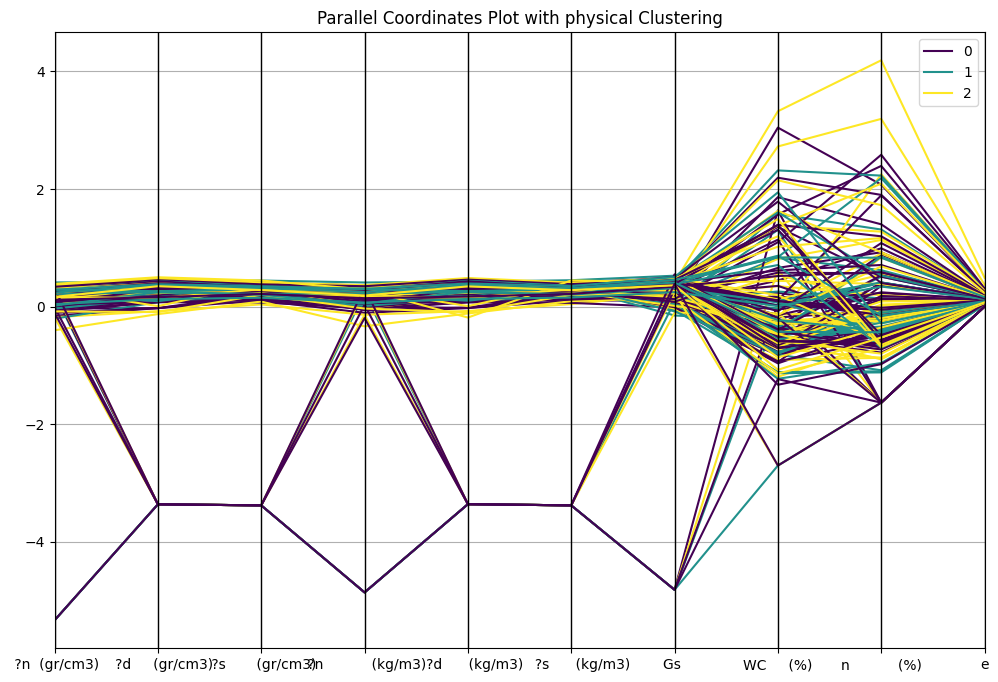

In [35]:
# Plotting
plt.figure(figsize=(12, 8))
pd.plotting.parallel_coordinates(df12, 'Cluster', colormap='viridis')
plt.title('Parallel Coordinates Plot with physical Clustering')
plt.show()

### Adding GAD column to the final dataframe.

In [43]:
# Concatenating along rows (axis=0)
df5 = pd.concat([df12, df['GAD']], axis=1)
df5.head()

,?n (gr/cm3),?d (gr/cm3),?s (gr/cm3),?n (kg/m3),?d (kg/m3),?s (kg/m3),Gs,WC (%),n (%),e,Cluster,GAD
0,0.311180,0.260601,0.344578,0.306904,0.267832,0.182047,0.057564,0.442067,0.990435,0.17,0,2
1,0.212497,-3.365444,-3.383374,0.230024,-3.363166,-3.383274,0.080900,1.304605,-1.635458,0.00,1,5
2,0.261838,0.277545,0.328299,0.266203,0.283081,0.325245,0.127574,0.825417,0.617842,0.15,1,5
3,0.187826,0.260601,0.263181,0.205151,0.269526,0.266664,0.127574,0.164138,0.103309,0.11,0,5
4,0.163156,0.108104,0.230623,0.184800,0.113646,0.225983,-0.012446,1.572950,1.309800,0.20,1,5


In [44]:
df5.columns

Index([' ?n  (gr/cm3)', '   ?d     (gr/cm3)', ' ?s       (gr/cm3)',
       ' ?n           (kg/m3)', '   ?d      (kg/m3)', '     ?s      (kg/m3)',
       'Gs ', 'WC     (%)', 'n           (%)', 'e', 'Cluster', 'GAD'],
      dtype='object')

In [45]:
g = df5.drop([' ?n  (gr/cm3)', '   ?d     (gr/cm3)',
       ' ?s       (gr/cm3)', ' ?n           (kg/m3)', '   ?d      (kg/m3)',
       '     ?s      (kg/m3)', 'Gs ', 'WC     (%)', 'n           (%)', 'e'], axis=1)
g.head()

,Cluster,GAD
0,0,2
1,1,5
2,1,5
3,0,5
4,1,5


### Extracting Cluster 0 with GAD location

In [46]:
# Extract data points belonging to Cluster 1
cluster_0_data = g[g['Cluster'] == 0]
cluster_0_data

,Cluster,GAD
0,0,2
3,0,5
7,0,6
10,0,8
11,0,8
...,...,...
138,0,35
139,0,35
141,0,35
144,0,37


In [47]:
cluster_0_data.to_csv('physical cluster 0.csv', index=True)

### Extracting Cluster 1 with GAD location

In [48]:
# Extract data points belonging to Cluster 1
cluster_1_data = g[g['Cluster'] == 1]
cluster_1_data

,Cluster,GAD
1,1,5
2,1,5
4,1,5
14,1,8
17,1,9
24,1,11
35,1,11
36,1,11
37,1,11
42,1,11


In [49]:
cluster_1_data.to_csv('physical cluster 1.csv', index=True)

### Extracting Cluster 2 with GAD location

In [50]:
# Extract data points belonging to Cluster 1
cluster_2_data = g[g['Cluster'] == 2]
cluster_2_data

,Cluster,GAD
5,2,5
6,2,5
8,2,7
9,2,8
13,2,8
23,2,11
25,2,11
27,2,11
28,2,11
32,2,11


In [51]:
cluster_2_data.to_csv('physical cluster 2.csv', index=True)